In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Setting the path of data
dir_data = './Day2data/'
train = os.path.join(dir_data, 'application_train.csv')
train_data = pd.read_csv(train)
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
dtype_select = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_data_num= train_data.select_dtypes(include=dtype_select)
print(train_data_num.head())

   SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801       -9461   
1      35698.5        1129500.0                    0.003541      -16765   
2       6750.0         135000.0                    0.010032      -19046   
3      29686.5         297000.0                    0.008019      -19005   
4      21865.5         513000.0                    0.028663      -19932   

   DAYS_EMPLOYED             ...              FLAG_DOCUMENT_18  \
0           -637             ...                             0   
1 

In [4]:
numeric_columns = list(train_data_num.columns[list(train_data_num.apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns %s" % len(numeric_columns))
print(len(numeric_columns))

Numbers of remain columns 73
73


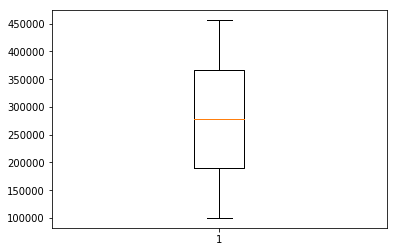

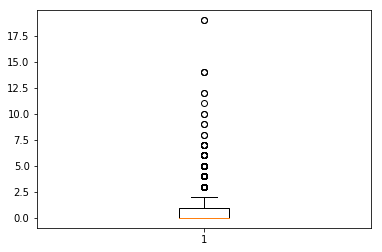

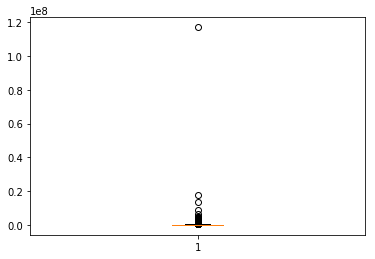

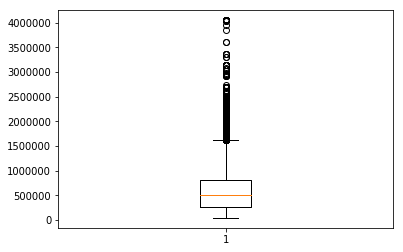

/Users/vincent/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/vincent/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/Users/vincent/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/Users/vincent/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/Users/vincent/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


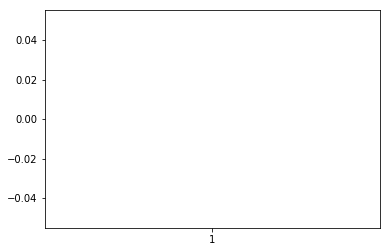

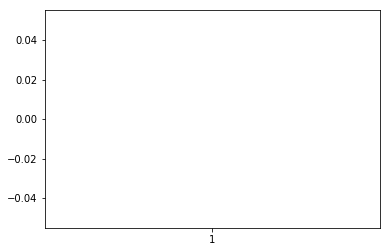

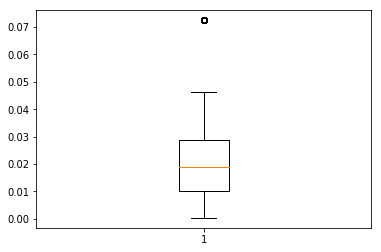

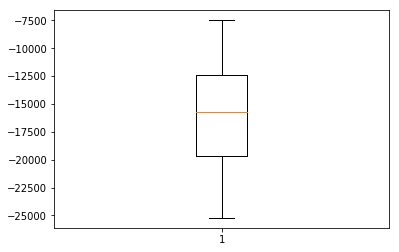

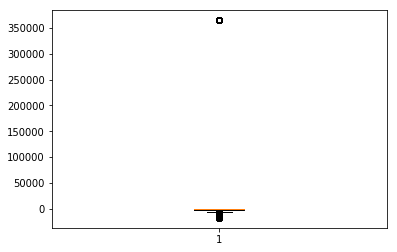

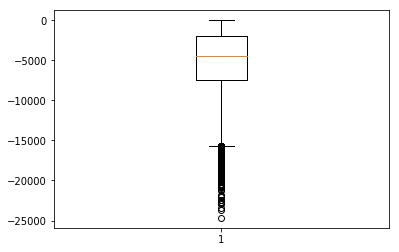

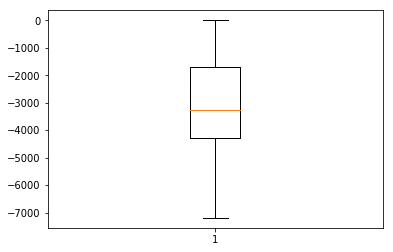

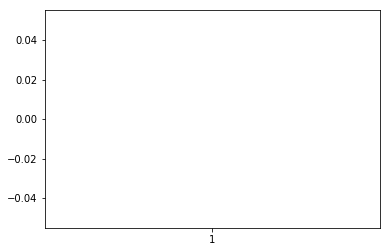

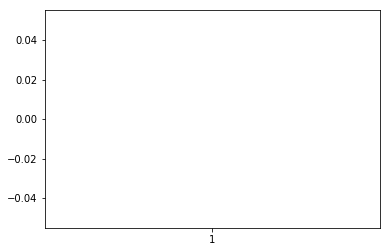

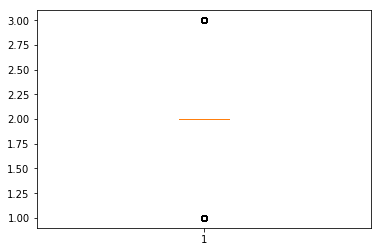

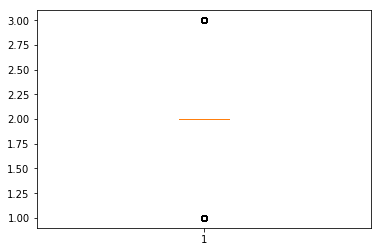

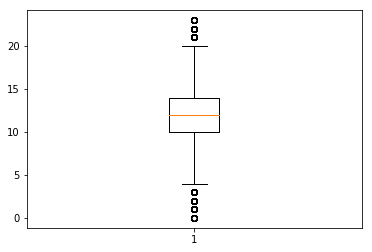

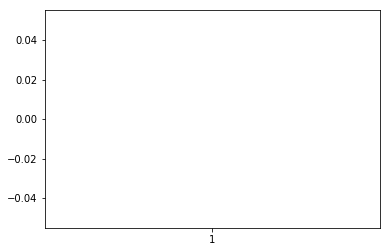

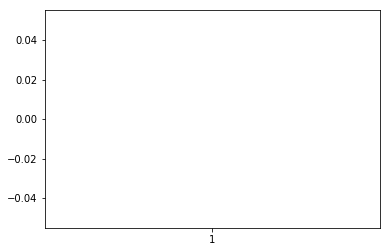

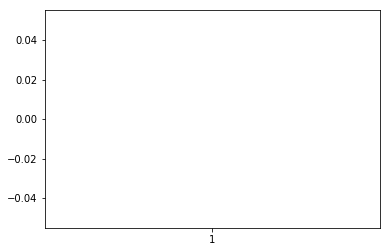

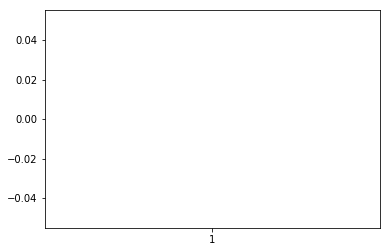

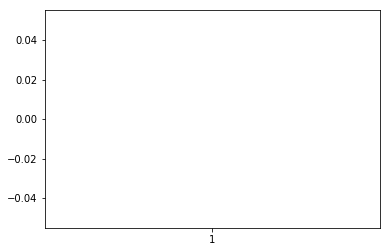

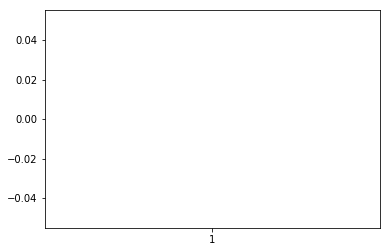

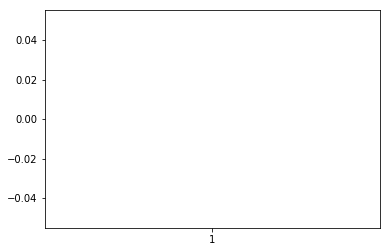

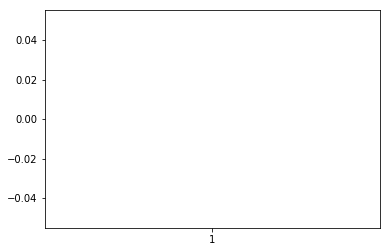

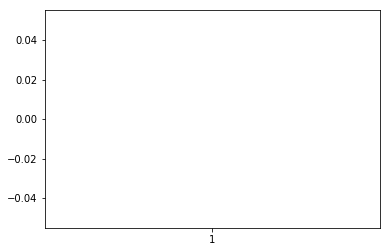

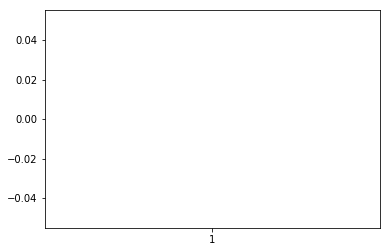

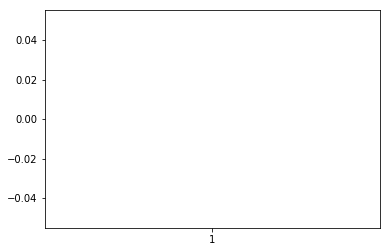

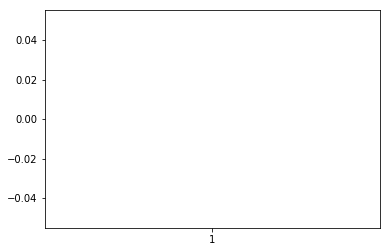

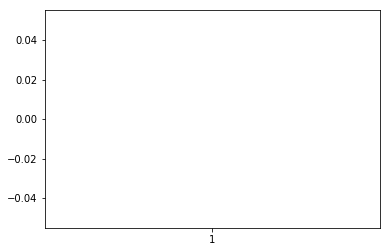

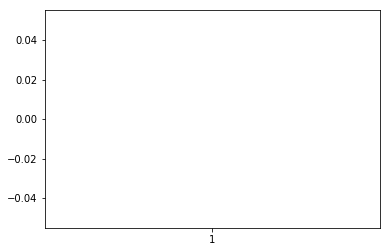

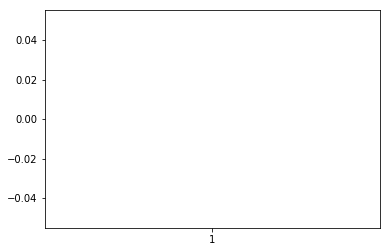

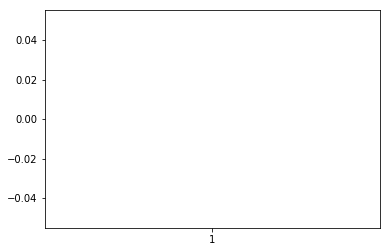

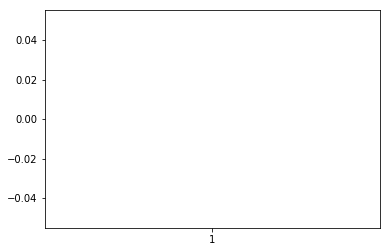

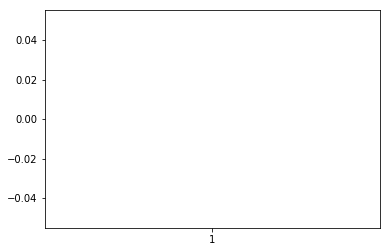

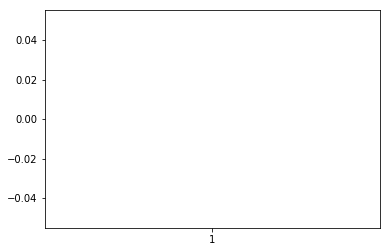

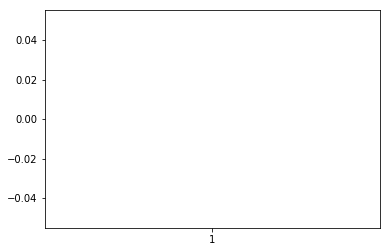

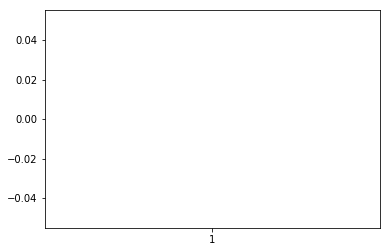

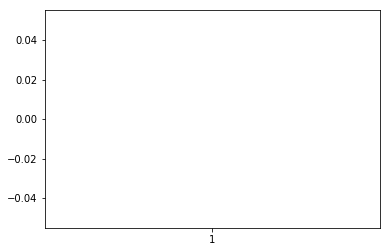

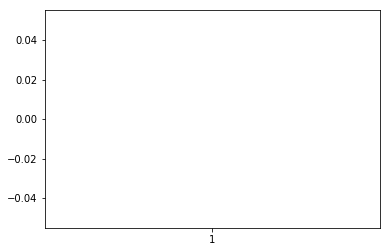

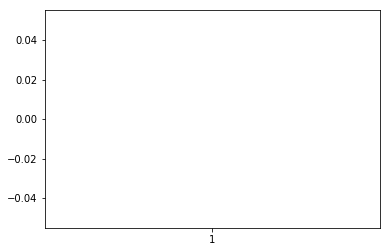

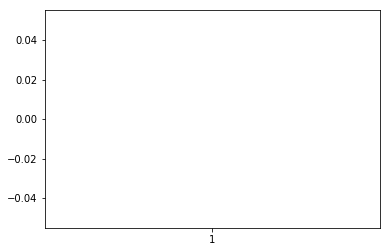

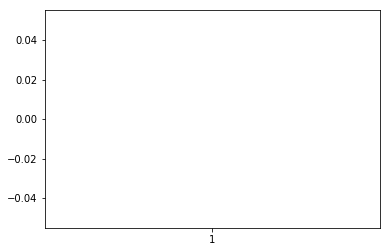

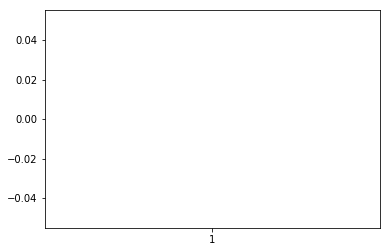

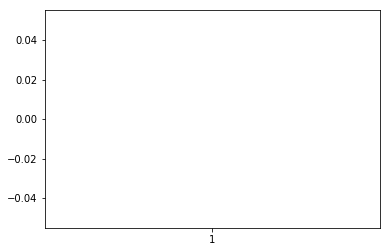

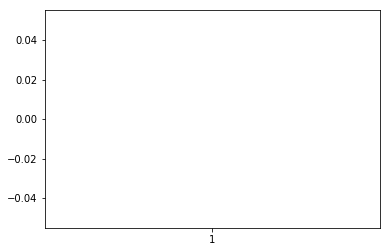

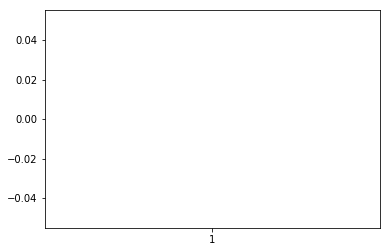

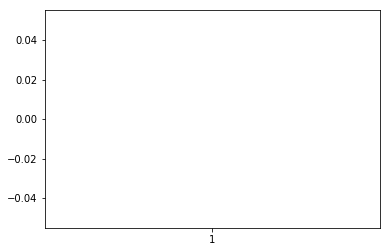

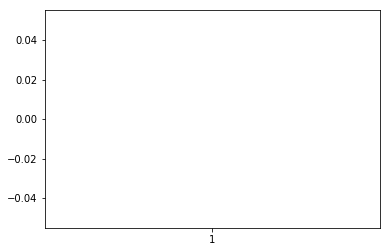

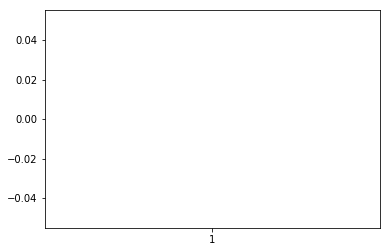

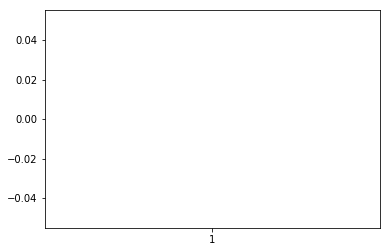

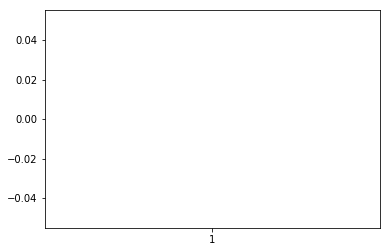

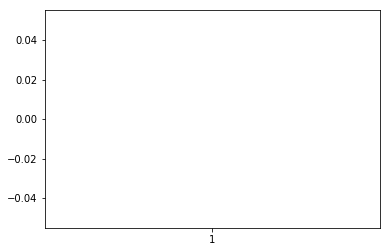

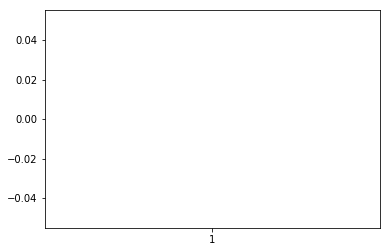

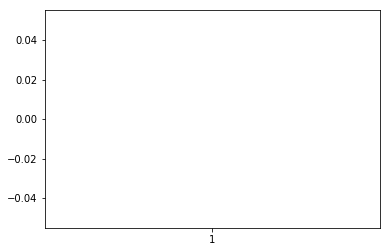

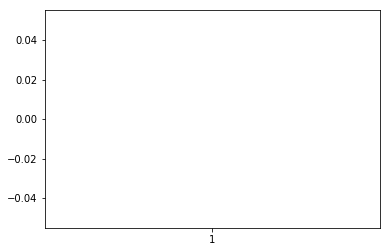

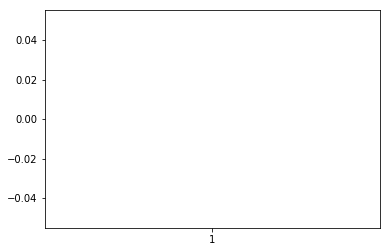

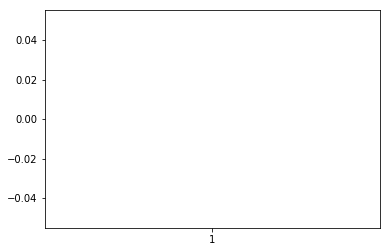

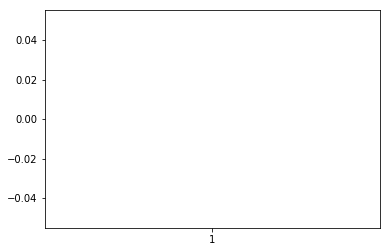

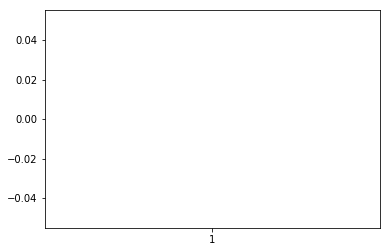

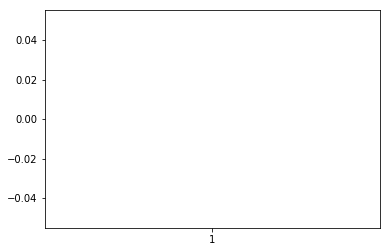

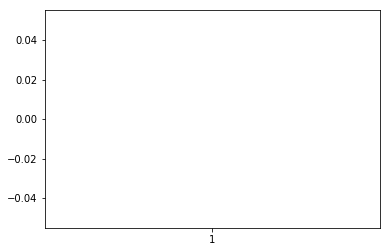

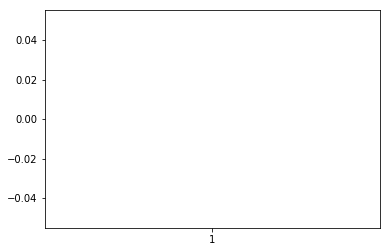

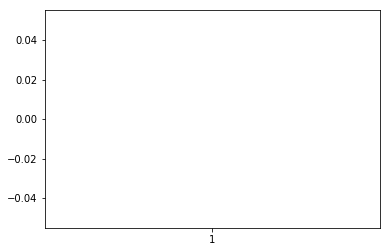

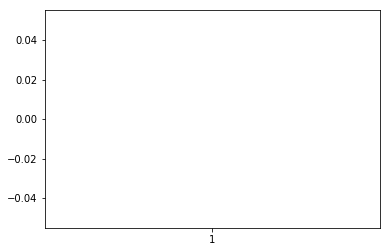

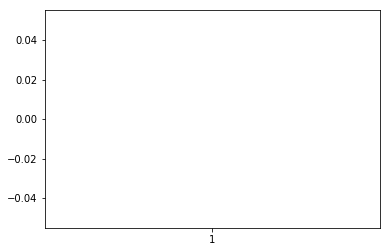

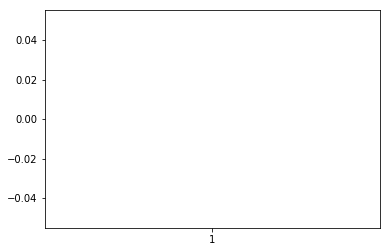

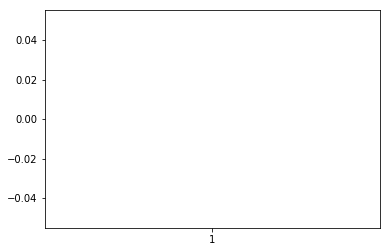

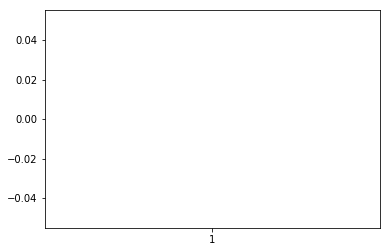

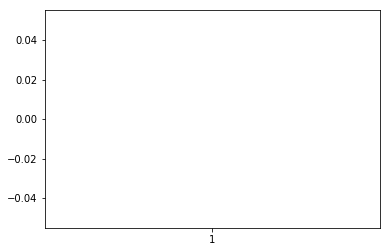

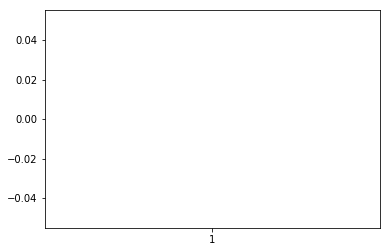

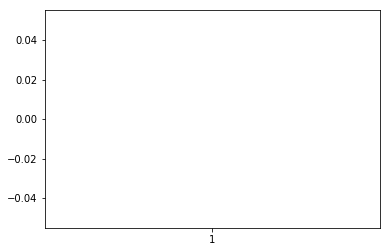

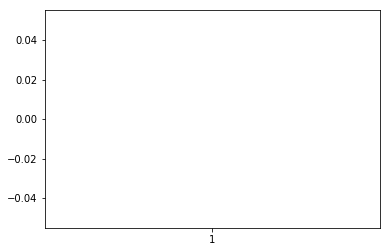

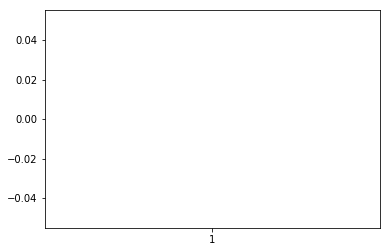

In [5]:
for col in numeric_columns:
    
    plt.boxplot(train_data[col])
    plt.show()

In [6]:
# The columns downbelow seem to have strange value

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE
print(train_data['AMT_INCOME_TOTAL'].describe())

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


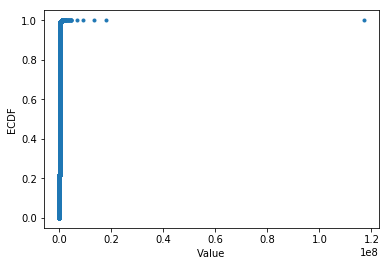

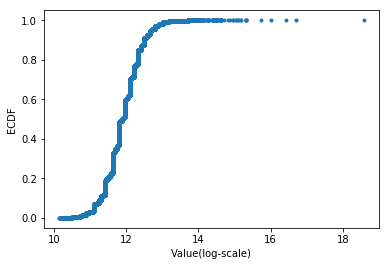

In [7]:
# plotting the ECDF for the column "ANT_INCOME_TOTAL"
cdf = train_data["AMT_INCOME_TOTAL"]
x = np.sort(cdf)
y = np.arange( 1, len(x)+1) / len(x)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.plot( x, y, marker='.',linestyle = 'none' )
plt.show()

x = np.sort(cdf)
y = np.arange( 1, len(x)+1) / len(x)
plt.xlabel('Value(log-scale)')
plt.ylabel('ECDF')
plt.plot( np.log(x), y, marker='.',linestyle = 'none' )
plt.show()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


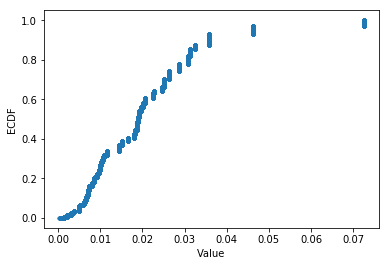

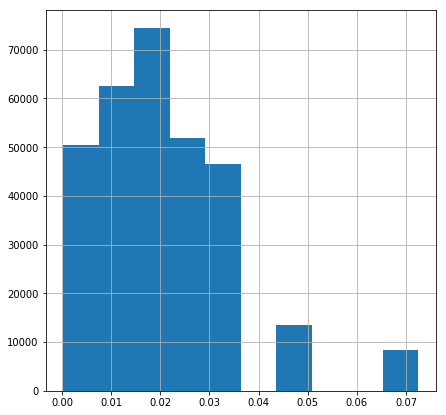

In [8]:
# Plotting the ECDF of the column "REGION_POPULATION_RELATIVE"
print(train_data['REGION_POPULATION_RELATIVE'].describe()) 

cdf = train_data['REGION_POPULATION_RELATIVE']
x = np.sort(cdf)
y = np.arange( 1, len(x)+1) / len(x)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.plot( x, y, marker='.',linestyle = 'none' )
plt.show()

plt.figure(figsize=(7,7))
train_data['REGION_POPULATION_RELATIVE'].hist()
plt.show()

# train_data['REGION_POPULATION_RELATIVE'].value_counts()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


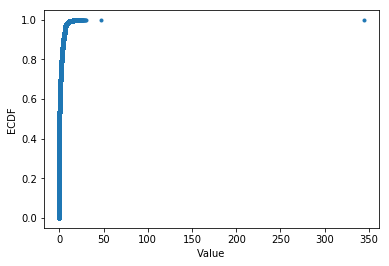

In [9]:
# Plotting the ECDF of column "OBS_60_CNT_SOCIAL_CIRCLE"
print(train_data['OBS_60_CNT_SOCIAL_CIRCLE'].describe())
cdf = train_data['OBS_60_CNT_SOCIAL_CIRCLE']
x = np.sort(cdf)
y = np.arange( 1, len(x)+1) / len(x)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.plot( x, y, marker='.',linestyle = 'none' )
plt.show()

In [10]:
# the value 344 must be an outlier and also in order to make the ECDF clear so I delete the value that is more than 30 using the code down below
for i in range(307511):
    try:
        if train_data['OBS_60_CNT_SOCIAL_CIRCLE'][i] > 30:
            del train_data['OBS_60_CNT_SOCIAL_CIRCLE'][i]
    except KeyError:
        print("position %s KeyError occurs!!!",i)

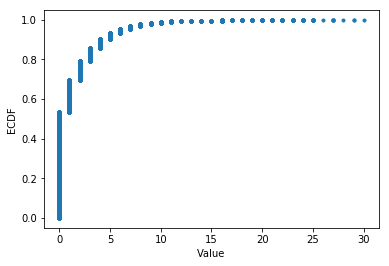

In [11]:
cdf = train_data['OBS_60_CNT_SOCIAL_CIRCLE']
x = np.sort(cdf)
y = np.arange( 1, len(x)+1) / len(x)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.plot( x, y, marker='.',linestyle = 'none' )
plt.show()